In [2]:
import comet_ml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from comet_ml.query import Tag
from comet_ml.query import Parameter 
from comet_ml import API

In [9]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
tagged = Tag("top1,5_ver.10")
compression_rate_params = Parameter('compression_strength')
model_name = Parameter('model_name')
query = ((compression_rate_params == -10) & (model_name == "timesformer") & tagged)
experiments = api.query("ohtani", "jpeg-compression", query)
top1_list = experiments[0].get_metrics("validate_acc1")
top1_score = float(top1_list[0].get("metricValue"))

In [6]:
experiments[0]

<APIExperiment 'ohtani/jpeg-compression/28ced2a178034c1a8b4d431e0c306f7e'>

In [10]:
top1_score

77.34909456740442

一つのグラフにまとめる

top1

slowfast_r101
12
slowfast_r50
12
x3d_m
12
x3d_s
12
x3d_xs
12
slow_r50
12


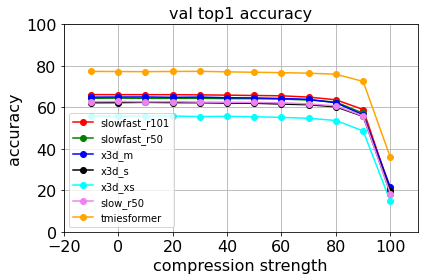

In [13]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top1acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('compression strength')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top1 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-20, 110)
ax.set_ylim(0, 100)
labels = list(range(-10, 110, 10))
colors = ["red", "green", "blue", "black" , "cyan" , "violet", "orange"]

for model in models:
    acc_len = 0
    print(model)
    model_top1_list = str(model) + '_top1_na_100_list = []' 
    exec(model_top1_list)
    # model_top5_list = str(model) + '_top5_na_100_list = []' 
    # exec(model_top5_list)
    for i in range(-1, 11, 1):
        compression_rate = i * 10
        # print(compression_rate)
        tagged = Tag("top1,5_ver.10")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        top1_list = experiments[0].get_metrics("validate_acc1")
        # print(top1_list)
        top1_score = top1_list[0].get("metricValue")
        # top5_list = experiments[0].get_metrics("validate_acc5")
        # # top5_score = top5_list[0].get("metricValue")
        model_top1_list_append = str(model) + '_top1_na_100_list.append(top1_score)' 
        exec(model_top1_list_append)
        # # # model_top5_list_append = str(model) + '_top5_na_100_list.append(top5_score)' 
        # exec(model_top5_list_append)

    model_top1_list_float_len = 'acc_len = len(' + str(model) + '_top1_na_100_list)' 
    exec(model_top1_list_float_len)
    for j in range(acc_len):
        model_top1_list_float = str(model) + '_top1_na_100_list[j] = float(' + str(model) + '_top1_na_100_list[j])'
        exec(model_top1_list_float)
    top1acc_list_appen = 'top1acc_list.append(' + str(model) + '_top1_na_100_list)'
    exec(top1acc_list_appen)
    print_acc = 'print(len(' + str(model) + '_top1_na_100_list))'
    exec(print_acc)


    index = models.index(model)
    model_plt = "ax.plot(labels," + str(model) + "_top1_na_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

tmiesformer_top1_na_100_list = []
tagged = Tag("top1,5_ver.10")
compression_rate_params = Parameter('compression_strength')
model_name = Parameter('model_name')
for i in range(-1, 11, 1):
    compression_rate = i * 10
    query = ((compression_rate_params == compression_rate) & (model_name == "timesformer") & tagged)
    experiments = api.query("ohtani", "jpeg-compression", query)
    top1_list = experiments[0].get_metrics("validate_acc1")
    top1_score = float(top1_list[0].get("metricValue"))
    tmiesformer_top1_na_100_list.append(top1_score)
ax.plot(labels, tmiesformer_top1_na_100_list, '-o', color="orange", label="tmiesformer")

parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/jpeg/num_models/7/val_top1acc_-10_100.pdf')
plt.show()

        

top5

slowfast_r101
slowfast_r50
x3d_m
x3d_s
x3d_xs
slow_r50


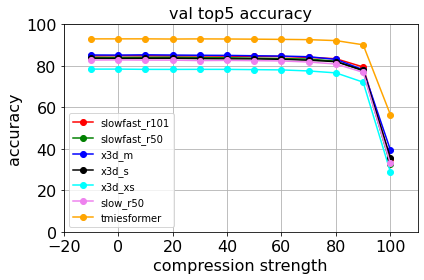

In [16]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('compression strength')  # x軸ラベル
ax.set_ylabel('accuracy')  # y軸ラベル
ax.set_title("val top5 accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-20, 110)
ax.set_ylim(0, 100)
labels = list(range(-10, 110, 10))
colors = ["red", "green", "blue", "black" , "cyan" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_top5_list = str(model) + '_top5_na_100_list = []' 
    exec(model_top5_list)
    # model_top5_list = str(model) + '_top5_na_100_list = []' 
    # exec(model_top5_list)
    for i in range(-1, 11, 1):
        compression_rate = i * 10
        # print(compression_rate)
        tagged = Tag("top1,5_ver.10")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        # top1_list = experiments[0].get_metrics("validate_acc1")
        # top1_score = top1_list[0].get("metricValue")
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        # model_top1_list_append = str(model) + '_top1_na_100_list.append(top1_score)' 
        # exec(model_top1_list_append)
        model_top5_list_append = str(model) + '_top5_na_100_list.append(top5_score)' 
        exec(model_top5_list_append)

    model_top5_list_float_len = 'acc_len = len(' + str(model) + '_top5_na_100_list)' 
    exec(model_top5_list_float_len)
    for j in range(acc_len):
        model_top5_list_float = model + '_top5_na_100_list[j] = float(' + str(model) + '_top5_na_100_list[j])'
        exec(model_top5_list_float)
    # top5acc_list_appen = 'top5acc_list.append(' + str(model) + '_top5_na_100_list)'
    # exec(top5acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(labels," + str(model) + "_top5_na_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

tmiesformer_top5_na_100_list = []
tagged = Tag("top1,5_ver.10")
compression_rate_params = Parameter('compression_strength')
model_name = Parameter('model_name')
for i in range(-1, 11, 1):
    compression_rate = i * 10
    query = ((compression_rate_params == compression_rate) & (model_name == "timesformer") & tagged)
    experiments = api.query("ohtani", "jpeg-compression", query)
    top5_list = experiments[0].get_metrics("validate_acc5")
    top5_score = float(top5_list[0].get("metricValue"))
    tmiesformer_top5_na_100_list.append(top5_score)
ax.plot(labels, tmiesformer_top5_na_100_list, '-o', color="orange", label="tmiesformer")


parameters = {'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 16,
        }
plt.rcParams.update(parameters) 
ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/jpeg/num_models/7/val_top5acc_-10_100.pdf')
plt.show()

        

モデルごとにグラフ作成

slowfast_r101


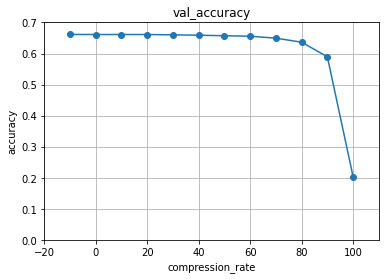

slowfast_r50


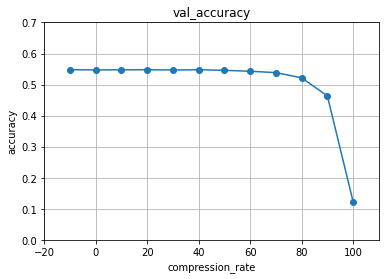

x3d_l


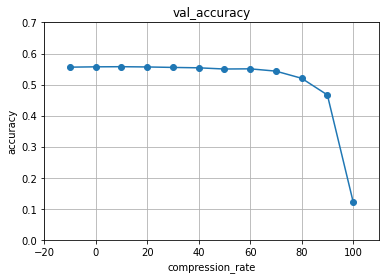

x3d_m


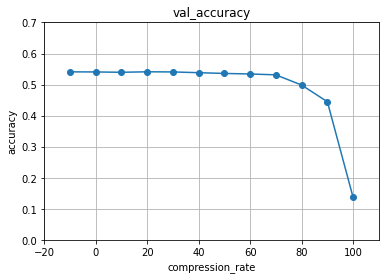

x3d_s


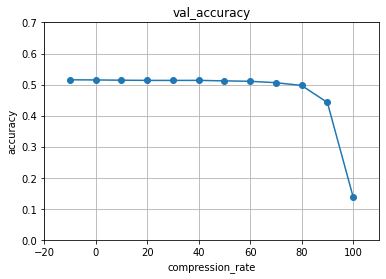

x3d_xs


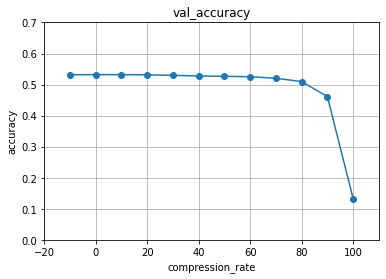

slow_r50


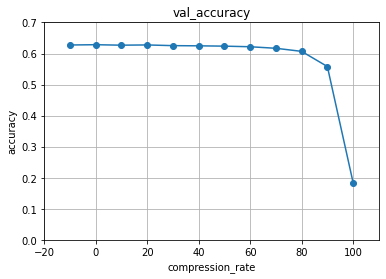

In [4]:
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
models = ["slowfast_r101", "slowfast_r50", "x3d_m", "x3d_s", "x3d_xs", "slow_r50"]
top5acc_list = []

fig, ax = plt.subplots()
ax.set_xlabel('compression_strength')  # x軸ラベル
ax.set_ylabel('top5')  # y軸ラベル
ax.set_title("val_top5_accuracy") # グラフタイトル
ax.grid()            # 罫線
ax.set_xlim(-20, 110)
ax.set_ylim(0, 0.7)
labels = list(range(-10, 110, 10))
colors = ["red", "green", "blue", "black" , "yellow" , "violet"]

for model in models:
    acc_len = 0
    print(model)
    model_top5_list = str(model) + '_top5_na_100_list = []' 
    exec(model_top5_list)
    for i in range(-1, 11, 1):
        compression_rate = i * 10
        # print(compression_rate)
        tagged = Tag("ver.30")
        compression_rate_params = Parameter('compression')
        model_name = Parameter('model')
        query = ((compression_rate_params == compression_rate) & (model_name == model) & tagged)
        experiments = api.query("ohtani", "jpeg-compression", query)
        top5_list = experiments[0].get_metrics("validate_acc5")
        top5_score = top5_list[0].get("metricValue")
        model_top5_list_append = str(model) + '_top5_na_100_list.append(top5_score)' 
        exec(model_top5_list_append)

    model_top5_list_float_len = 'acc_len = len(' + str(model) + '_top5_na_100_list)' 
    exec(model_top5_list_float_len)
    for j in range(acc_len):
        model_top5_list_float = model + '_top5_na_100_list[j] = float(' + str(model) + '_top5_na_100_list[j])'
        exec(model_top5_list_float)
    top5acc_list_appen = 'top5acc_list.append(' + str(model) + '_top5_na_100_list)'
    exec(top5acc_list_appen)


    index = models.index(model)
    model_plt = "ax.plot(labels," + str(model) + "_top5_na_100_list, '-o', color=colors[index], label=model)"
    exec(model_plt)

ax.legend(loc=0) 
fig.tight_layout()  # レイアウトの設定
plt.savefig('../acc_fig/jpeg/val_top5acc_-10_100.pdf')
plt.show()

        